# Fake News Detection using Naïve Bayes
We have created a model to determine if a piece of news is fake or not, based on its title. We have used 4 Naïve Bayes algorithms, namely Gaussian, Bernoulli and Multinomial.

**About Dataset**

The dataset that we have used is from [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) and submitted by [Clément Bisaillon](https://www.kaggle.com/clmentbisaillon)

Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

The zip file contains two csv files


*   Fake.csv
*   True.csv

Both files contain 4 columns. Fake.csv contains 23481 rows and True.csv contains 21417 rows.

###About The Model
Naïve Bayes has proven to not only be simple but also fast, accurate, and reliable Machine Learning algorithm, that works really well with `Natural Language Processing (NLP)`-related problems.

Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.

**Bayes Theorem**

Bayes Theorem is conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

![picture](https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg)
<center>Source: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html</center>

###Installing kaggle and importing datasets
We've installed kaggle on our Google Colab notebook and imported the dataset [Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). 


In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

 81% 33.0M/41.0M [00:00<00:00, 50.2MB/s]
100% 41.0M/41.0M [00:00<00:00, 65.8MB/s]


After downloading the dataset, we have to unzip the zip file.

In [3]:
!unzip fake-and-real-news-dataset

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


###Importing All Dependencies

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

We have created two dataframes from the two CSV files that we have fetched from Kaggle.

In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Dropping the column `subject`, `date` and `text` as we do not require them.

In [3]:
fake.drop(['subject','date', 'text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 0 in all rows in a newly created column in Fake.csv file, using list comprehension.

In [4]:
fake['target'] = pd.Series([0 for x in range(len(fake.index))])

In [ ]:
fake.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


Dropping the column `subject`, `date` and `text` as we do not require them.

In [5]:
true.drop(['subject','date','text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 1 in all rows in a newly created column in True.csv file, using list comprehension.

In [6]:
true['target'] = pd.Series([1 for x in range(len(true.index))])

In [ ]:
true.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


Due to our limitation in computing power, we cannot keep all the rows in the two files and instead keep only 5000 rows from each of the files.

In [7]:
true.drop(true.index[15000:], inplace=True)

In [8]:
true.shape

(15000, 2)

In [9]:
fake.drop(fake.index[15000:], inplace=True)

In [10]:
fake.shape

(15000, 2)

###Merging the two dataframes
Since, we now have target column inboth the files, we can merge them and create a new dataframe `data`

In [11]:
data = fake.append(true, ignore_index=True)

In [12]:
data.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [13]:
data.tail()

,title,target
29995,Australian publisher delays book alleging Chin...,1
29996,Exclusive: Japan to delay multi-billion dollar...,1
29997,"Strong quake hits Costa Rica, no reports of ma...",1
29998,United resumes Newark-Delhi flights after halt...,1
29999,Freeport Indonesia mine access road reopened a...,1


In [14]:
data.shape

(30000, 2)

We're going to shuffle the dataset to randomize our data resetting the `index`

In [15]:
data = data.sample(frac=1, random_state=1, ignore_index=True)

In [16]:
data.head()

,title,target
0,WHY IT’S GOOD NEWS For Conservatives That Bitt...,0
1,DEMOCRATS CAUGHT Paying Halfway House Patients...,0
2,Lebanon's president says crisis over with PM H...,1
3,WATCH: Ted Cruz Tells Social Worker He’s Goin...,0
4,Trump's spokesman promises reporters 'never to...,1


In [17]:
data.tail()

,title,target
29995,Trump eyes top policy aide for communications ...,1
29996,D’oh!: Trump Tells Crowd In Richest County In...,0
29997,JUDGE JEANINE TELLS THE LEFT TO KNOCK IT OFF: ...,0
29998,GOP Lawmaker: Republicans Are Freaking Out Ab...,0
29999,South Korea postpones university exam after ra...,1


##Pre-processing
###Letter Case, Punctuation and Stopwords
Let's start by removing punctuations, making all the words lowercase and removing stopwords.

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def process_text(s):
  # Check string to see if they are a punctuation
  nopunc = [char for char in s if char not in string.punctuation]
  # Join the characters again to form the string.
  nopunc = ''.join(nopunc)
  # Convert string to lowercase and remove stopwords
  clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return clean_string

In [20]:
data['title'] = data['title'].apply(process_text)

In [21]:
data.head(3)

,title,target
0,"[IT’S, GOOD, NEWS, Conservatives, Bitter, Hill...",0
1,"[DEMOCRATS, CAUGHT, Paying, Halfway, House, Pa...",0
2,"[Lebanons, president, says, crisis, PM, Hariri...",1


In [22]:
# join the words into a string
data['title'] = data['title'].apply(lambda x: " ".join(x))

In [23]:
data.head(3)

,title,target
0,IT’S GOOD NEWS Conservatives Bitter Hillary Ca...,0
1,DEMOCRATS CAUGHT Paying Halfway House Patients...,0
2,Lebanons president says crisis PM Hariris Fran...,1


###Converting Strings into categorical values
As of now, we only have strings as our feature, which we must split into words and turn these words into categorical values. To do this, we used both `Count Vectorizer` and `TFIDF Vectorizer` saved in dataframes `data_cv` and `data_tv`. We'll use `GaussianNB` on `data_tv` and `BernoulliNB` and `MultinomialNB` on `data_cv`

In [24]:
#Using Count Vectorization
cv=CountVectorizer()
X_cv=cv.fit_transform(data.title).toarray()
#Using TFIDF Vectorization
tv=TfidfVectorizer()
X_tv=tv.fit_transform(data.title).toarray()

In [25]:
X_cv.shape

(30000, 20135)

In [26]:
X_tv.shape

(30000, 20135)

In [27]:
y = data[['target']]

###Splitting Train and Test Datasets

In [28]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size=0.25, random_state=0)
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.25, random_state=0)

We're going to import `GaussianNB`,`BernoulliNB`, `MultinomialNB` and `ComplementNB` from `sklearn.naive_bayes`

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

###Fitting Our Train Data to the Models

In [30]:
gnb = GaussianNB()
y_pred_tv = gnb.fit(X_train_tv, y_train_tv).predict(X_test_tv)
print("Gaussian Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_tv, y_pred_tv))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gaussian Naïve Bayes Algorithm's Accuracy Score: 0.8416
Gaussian Naïve Bayes Algorithm's Precision Score: 0.8020244821092278
Gaussian Naïve Bayes Algorithm's Recall Score: 0.9075652637187
Gaussian Naïve Bayes Algorithm's F1 Score: 0.8515371157210697


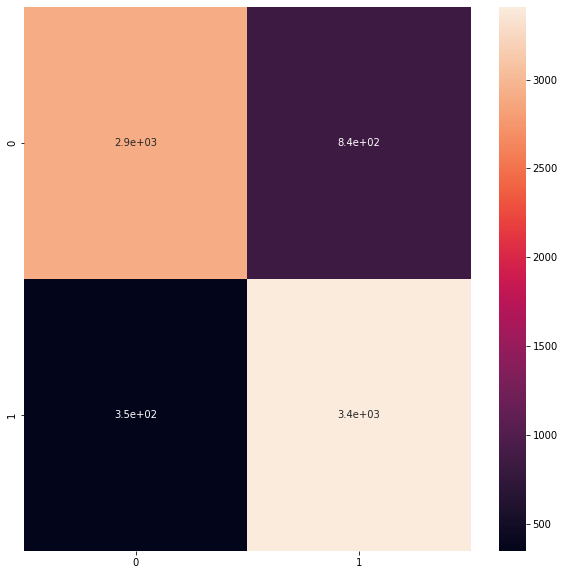

In [31]:
#Get the confusion matrix
cm_gnb = confusion_matrix(y_test_tv, y_pred_tv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_gnb, annot = True)

In [32]:
cm_gnb

array([[2905,  841],
       [ 347, 3407]])

In [33]:
bnb = BernoulliNB()
y_pred_cv = bnb.fit(X_train_cv, y_train_cv).predict(X_test_cv)
print("Bernoulli Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_cv, y_pred_cv))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bernoulli Naïve Bayes Algorithm's Accuracy Score: 0.9486666666666667
Bernoulli Naïve Bayes Algorithm's Precision Score: 0.9420099711361847
Bernoulli Naïve Bayes Algorithm's Recall Score: 0.9563132658497603
Bernoulli Naïve Bayes Algorithm's F1 Score: 0.9491077329808327


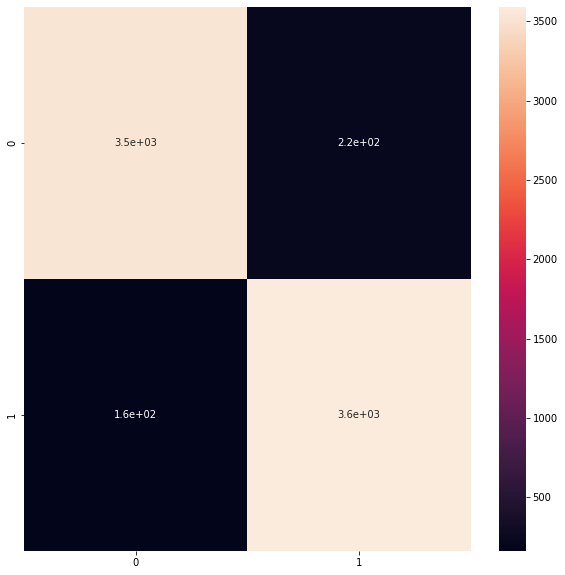

In [34]:
#Get the confusion matrix
cm_bnb = confusion_matrix(y_test_cv, y_pred_cv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_bnb, annot = True)

In [35]:
cm_bnb

array([[3525,  221],
       [ 164, 3590]])

In [36]:
mnb = MultinomialNB()
y_pred_cv = mnb.fit(X_train_cv, y_train_cv).predict(X_test_cv)
print("Multinomial Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_cv, y_pred_cv))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naïve Bayes Algorithm's Accuracy Score: 0.9426666666666667
Multinomial Naïve Bayes Algorithm's Precision Score: 0.946534121440086
Multinomial Naïve Bayes Algorithm's Recall Score: 0.9384656366542354
Multinomial Naïve Bayes Algorithm's F1 Score: 0.9424826110219369


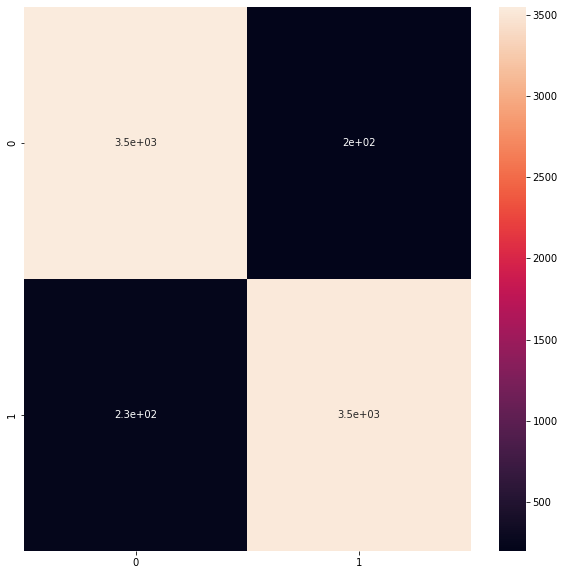

In [37]:
#Get the confusion matrix
cm_mnb = confusion_matrix(y_test_cv, y_pred_cv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_mnb, annot = True)

In [38]:
cm_mnb

array([[3547,  199],
       [ 231, 3523]])

##Testing Headlines from Reuters (Real News)
[Link to the first news](https://www.reuters.com/world/us/bidens-supreme-court-pick-jackson-faces-us-senate-panel-vote-2022-04-04/)

[Link to the second news](https://www.reuters.com/business/russia-ukraine-fallout-starts-felling-fragile-frontier-economies-2022-04-04/)

In [39]:
#For testing
result = bnb.predict(cv.transform(["Two more Senate Republicans announce support for Supreme Court pick Jackson"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


In [40]:
#For testing
result = bnb.predict(cv.transform(["Analysis: Russia-Ukraine fallout starts felling fragile 'frontier' economies"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


##Testing Headlines from Politifact (Fake News)
[Link to the first news](https://www.politifact.com/factchecks/2022/apr/04/mike-gibbons/ohio-gop-candidate-falsely-says-more-votes-registe/)

[Link to the second news](https://www.politifact.com/factchecks/2022/mar/17/facebook-posts/persistent-high-gas-prices-dont-prove-price-gougin/)

In [41]:
#For testing
result = bnb.predict(cv.transform(["According to the Census Bureau, “5 million more people voted than were registered to vote” in the 2020 election."]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


In [42]:
#For testing
result = bnb.predict(cv.transform(["Comparing the price of oil and gas in June 2008 to March 2022 shows that oil companies are 'price gouging.'"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


##Conclusion and Limitations
We used 3 popular Naïve Bayes algorithms of `Scikit Learn` library - Gaussian, Bernoulli and Multinomial. The accuracy, precision, recall and f1 scores for all 3 algorithms are as follow: 

**Gaussian Naïve Bayes:**
* Accuracy (0.8416),
* Precision (0.8020244821092278),
* Recall (0.9075652637187) and
* F1 (0.8515371157210697)

**Bernoulli Naïve Bayes**
* Accuracy (0.9486666666666667),
* Precision (0.9420099711361847),
* Recall (0.9563132658497603) and
* F1 (0.9491077329808327)

**Multinomial Naïve Bayes**
* Accuracy (0.9426666666666667),
* Precision (0.946534121440086),
* Recall (0.9384656366542354) and
* F1 (0.9424826110219369)

Bernoulli Naïve Bayes is proven to be the most effective algorithm for detecting Fake News. Although Multinomial Naïve Bayes also performed very close to Bernoulli. As we can see in the testing, our model could successfully detect the fake news and the real news.

Due to some limitation in our computing capacity, we could not use all 44,898 rows and used 30,000 rows instead. This model can be tested on larger datasets.

